# Introduction to Spatial Data Science and Machine Learning

## Overview
Welcome to the Introduction to Spatial Data Science and Machine Learning workshop on the Urban Design B-Pro programme 2022/2023. 

These workshops will provide a broad introduction to spatial data science with Python.

## 03. Machine Learning - Solutions
This notebook contains the solutions from 03_notebook.ipynb

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import libpysal
from libpysal import weights
import pysal
from pysal.model import spreg
from spreg import OLS
import sklearn
from sklearn import cluster
from sklearn.preprocessing import robust_scale
%matplotlib inline

/Users/liambolton/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


1. Build an OLS (non-spatial) regression model with the logarithmic imd average score as the dependent variable and the health deprivation and disability average score as the independent variable and print a summary of the results.

In [3]:
imd_2019 = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/03_machine_learning/data/gl_boro_imd_2019.geojson?raw=true")

imd_2019['log_imd_avg_score'] = np.log(imd_2019['imd_avg_score'])
y = imd_2019['imd_avg_score'].values
y_name = 'log_imd_score'

x = np.array([imd_2019.health_dep_disability_avg_score]).T
x_name = 'health_dep_dis_score'

W = weights.KNN.from_dataframe(imd_2019, k=6)
W.transform = 'r'

ols = OLS(y=y, 
          x=x, 
          w=W, 
          name_y=y_name, 
          name_x=[x_name], 
          name_w="W", 
          name_ds='imd_2019', 
          white_test=True, 
          spat_diag=True, 
          moran=True)

print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    imd_2019
Weights matrix      :           W
Dependent Variable  :log_imd_score                Number of Observations:          33
Mean dependent var  :     21.2939                Number of Variables   :           2
S.D. dependent var  :      6.0803                Degrees of Freedom    :          31
R-squared           :      0.6912
Adjusted R-squared  :      0.6813
Sum squared residual:     365.305                F-statistic           :     69.3951
Sigma-square        :      11.784                Prob(F-statistic)     :   2.074e-09
S.E. of regression  :       3.433                Log likelihood        :     -86.495
Sigma-square ML     :      11.070                Akaike info criterion :     176.989
S.E of regression ML:      3.3271                Schwarz criterion     :     179.982

----------------------------------------------------------------------------

2. Using IMD dataset and k-means, cluster the boroughs based on the IMD average score, the living environment average score and the health deprivation and disability average score and produce a choropleth map of the clusters.

<Figure size 432x288 with 0 Axes>

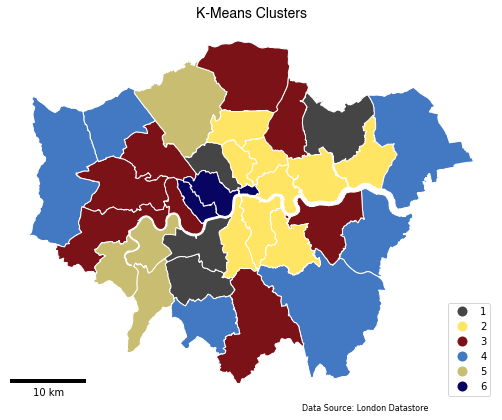

In [19]:
np.random.seed(0)

imd_data = gpd.read_file("https://github.com/lbuk/UD_Intro_SDSML2022/blob/master/03_machine_learning/data/gl_boro_imd_2019.geojson?raw=true")

cluster_variables = ["imd_avg_score", "living_env_avg_score", "health_dep_disability_avg_score"]

imd_2019_scaled = robust_scale(imd_data[cluster_variables])

kmeans = cluster.KMeans(n_clusters=6)

kmeans_clusters = kmeans.fit(imd_2019_scaled)

imd_kmeans_clusters = imd_data.assign(cluster=kmeans_clusters.labels_)
imd_kmeans_clusters['cluster'] = imd_kmeans_clusters['cluster'] + 1

fig = plt.figure()
ax = imd_kmeans_clusters.plot(column='cluster', 
                              figsize=(8.75, 8.75),
                              categorical=True, 
                              legend=True,
                              edgecolor='#ffffff',
                              cmap=ListedColormap(['#454545', '#FFE563', '#7a1217', '#4378C2', '#c9bd72', '#080462']),
                              legend_kwds={"loc": "lower right"})

font_title = {'family':'helvetica','color':'black','size':14}
plt.title('K-Means Clusters', fontdict=font_title) # Title

plt.annotate('Data Source: London Datastore', (0,0), (295,-10), fontsize=8, 
             xycoords='axes fraction', textcoords='offset points')

ax.set_axis_off()

ax.add_artist(ScaleBar(1, location='lower left'))

plt.show()

#### Note
Code and text from this lab was partly sourced from Daniel Arribas-Bel's tutorials on [Spatial Regression](http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html) and [Spatial Clustering](http://darribas.org/gds_scipy16/ipynb_md/07_spatial_clustering.html), which are licensed according to Creative Commons BY-NC-SA, as well as [Chapter 10](https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html) and [Chapter 11](https://geographicdata.science/book/notebooks/11_regression.html) of the open source [Geographic Data Science with Python](https://geographicdata.science/book/) book by Sergio J. Rey, Daniel Arribas-Bel and Levi J. Wolf, which is licensed according to Creative Commons BY-NC-SA.